# Function iamosaic

## Synopse

Create a 2D visualization of a 3D image.

- **g = iamosaic(f,N,s)**
    - **OUTPUT**
        - **g**: Image. Mosaic of 2D images.
    - **INPUT**
        - **f**: Image. 3D image.
        - **N**: Integer. Number of image columns in mosaic.
        - **s**: Float. Default: 1.0. Scale factor.

## Description

This function puts the slices of a 3D image side-by-side on a mosaic (2D image). The objective is to
provide basic 3D visualization.

In [39]:
import numpy as np
import scipy
import scipy.ndimage

def iamosaic(f,N,s=1.0):
    f = np.asarray(f)
    d,h,w = f.shape

    nLines = int(np.ceil(float(d)/N))
    nCells = nLines*N

    # Add black slices to match the exact number of mosaic cells
    fullf = np.resize(f, (nCells,h,w))
    fullf[d:nCells,:,:] = 0        

    Y,X = np.indices((nLines*h,N*w))

    Pts = np.array([
            (np.floor(Y/h)*N + np.floor(X/w)).ravel(),
            np.mod(Y,h).ravel(),
            np.mod(X,w).ravel() ]).astype(int).reshape((3,nLines*h,N*w))
    g = fullf[Pts[0],Pts[1],Pts[2]]
    if (s != 1.0):
        #g = scipy.ndimage.interpolation.zoom(g,s,order=5)
        g = scipy.misc.imresize(g,s,interp='bilinear')        
    return g

In [40]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ! jupyter nbconvert --to 'python' iamosaic
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook iamosaic.ipynb to python
[NbConvertApp] Writing 3751 bytes to iamosaic.py


## Examples


Example 1

In [41]:
if testing:
    t = np.arange(60)
    t.shape = (5,3,4)
    
    print('Original 3D image:\n', t, '\n\n')
    
    for i in range(1,7):
        g = iamosaic(t,i)
        print('Mosaic with %d image column(s):\n' % i)
        print(g)
        print()

    for i in range(1,7):
        g = iamosaic(t,i,0.8)
        print('Mosaic with %d image column(s):\n' % i)
        print(g)
        print()

Original 3D image:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]

 [[36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]]] 


Mosaic with 1 image column(s):

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]
 [32 33 34 35]
 [36 37 38 39]
 [40 41 42 43]
 [44 45 46 47]
 [48 49 50 51]
 [52 53 54 55]
 [56 57 58 59]]

Mosaic with 2 image column(s):

[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]
 [24 25 26 27 36 37 38 39]
 [28 29 30 31 40 41 42 43]
 [32 33 34 35 44 45 46 47]
 [48 49 50 51  0  0  0  0]
 [52 53 54 55  0  0  0  0]
 [56 57 58 59  0  0  0  0]]

Mosaic with 3 image column(s):

[[ 0  1  2  3 12 13 14 15 24 25 26 27]
 [ 4  5  6  7 16 17 18 19 28 29 30 31]
 [ 8  9 10 11 20 21 22 23 32 33 34 35]
 [36 37 38 39 48 49 50 51  0  0  0  0]
 [4

## Example 2

In [42]:
if testing:
    d,r,c = np.indices((5,3,4))
    t = ((r + c)%2) >0

    for i in range(1,7):
        g = iamosaic(t,i,0.8)
        print('Mosaic with %d image column(s):\n' % i)
        print(g)
        print()

Mosaic with 1 image column(s):

[[102 128 153]
 [136 128 119]
 [ 76 128 179]
 [147 128 108]
 [ 84 128 171]
 [119 128 136]
 [119 128 136]
 [ 84 128 171]
 [147 128 108]
 [ 76 128 179]
 [136 128 119]
 [102 128 153]]

Mosaic with 2 image column(s):

[[104 128 143 112 128 151]
 [132 128 124 131 128 123]
 [ 76 128 162  93 128 179]
 [147 128 114 141 128 108]
 [ 76 128 162  68  81 114]
 [132 128 112  10   0   0]
 [104 128 137  17   0   0]]

Mosaic with 3 image column(s):

[[115 128 136 119 128 136 119 128 140]
 [110 128 139 116 128 139 108 114 125]
 [110 128 139 116 128 131  23  14  20]
 [115 128 136 119 128 128  14   0   0]]

Mosaic with 4 image column(s):

[[115 128 136 119 128 136 119 128 136 119 128 140]
 [110 128 139 108 114 121 106 114 121 106 114 125]
 [110 128 131  23  14  18  10  14  18  10  14  20]
 [115 128 128  14   0   0   0   0   0   0   0   0]]

Mosaic with 5 image column(s):

[[112 133 133 115 140 122 122 140 115 133 133 115 140 122 122 143]
 [112 133 133 115 140 122 122 140 11

## Example 3

""
Mosaic of a created 3D image
""
Mosaic of a created 3D image with scale factor 0.2
""
Mosaic of a binary created 3D image
""
Mosaic of a binary created 3D image with scale factor 0.2

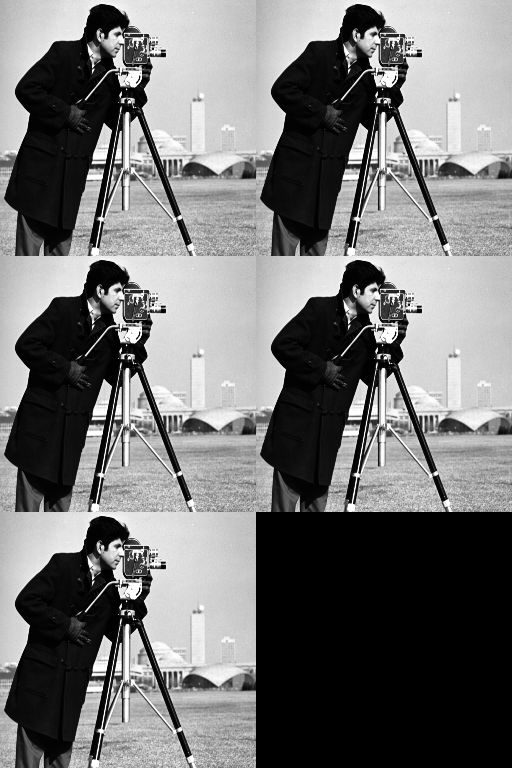
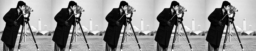
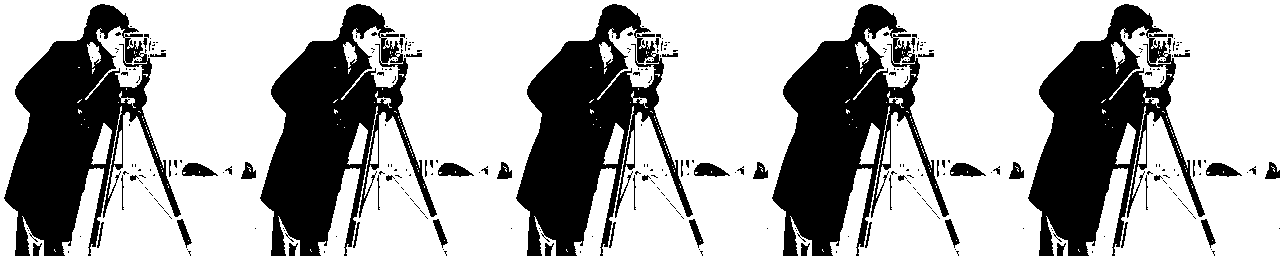
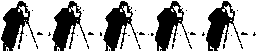

In [43]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    f3d = np.stack((np.copy(f),np.copy(f),np.copy(f),np.copy(f),np.copy(f)))
    nb = ia.nbshow(1)
    nb.nbshow(ia.normalize(iamosaic(f3d,2)), "Mosaic of a created 3D image")
    nb.nbshow(ia.normalize(iamosaic(f3d,5,0.2)), "Mosaic of a created 3D image with scale factor 0.2")
    nb.nbshow(iamosaic(ia.normalize(f3d)>80,5), "Mosaic of a binary created 3D image")
    nb.nbshow(ia.normalize(iamosaic((ia.normalize(f3d)>80).astype('uint8'),5,0.2)), "Mosaic of a binary created 3D image with scale factor 0.2")
    nb.nbshow()

Notice that the first mosaic do not appear to be 5 times bigger than the second one because it was
scaled by the visualization function *adshow()*.

## Equation

Each element of the original 3D image $(x_o,y_o,z_o)$ is mapped to an element on the destination
2D image (mosaic) $(x_d,y_d)$ by the equations

$$
x_o = x_d \mod{w},
$$

$$
y_o = y_d \mod{h},
$$

$$
z_o = \left \lfloor \dfrac{y_d}{h} \right \rfloor N + \left \lfloor \dfrac{x_d}{w} \right \rfloor,
$$

were $N$ is the number of image columns in mosaic, $w$ is the original image width and $h$
is the original image height.

## Contributions

- André Luis da Costa, 1o. semestre de 2011
- Leonardo Bianconi 1o. semestre 2017